# <font color='red'> Code Instalation</font>

In [1]:
from Nutridf import NutriClean

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
!pip install missingno 
import missingno as msno
import warnings
import scipy.stats as stats

warnings.filterwarnings("ignore")

from scipy.stats import f_oneway

In [2]:
from sklearn import preprocessing
import numpy as np
from sklearn.impute import KNNImputer

# <font color='red'> 1) Installing data</font> 

In [4]:
Product = pd.read_csv("openfoodfacts.csv",delimiter='\t',encoding='utf-8')

In [5]:
df= Product

In [6]:
#df.shape

# <font color='red'> 1.1) Read data</font> 

<AxesSubplot:>

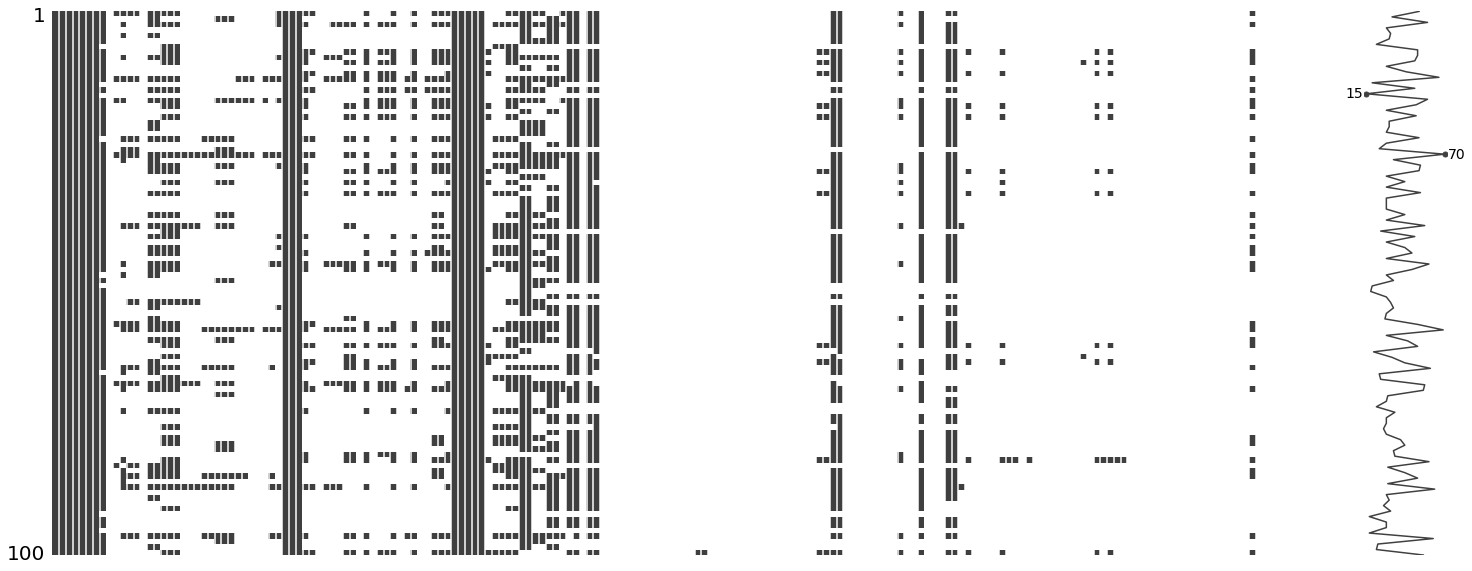

In [7]:
msno.matrix(df.sample(100))

<AxesSubplot:>

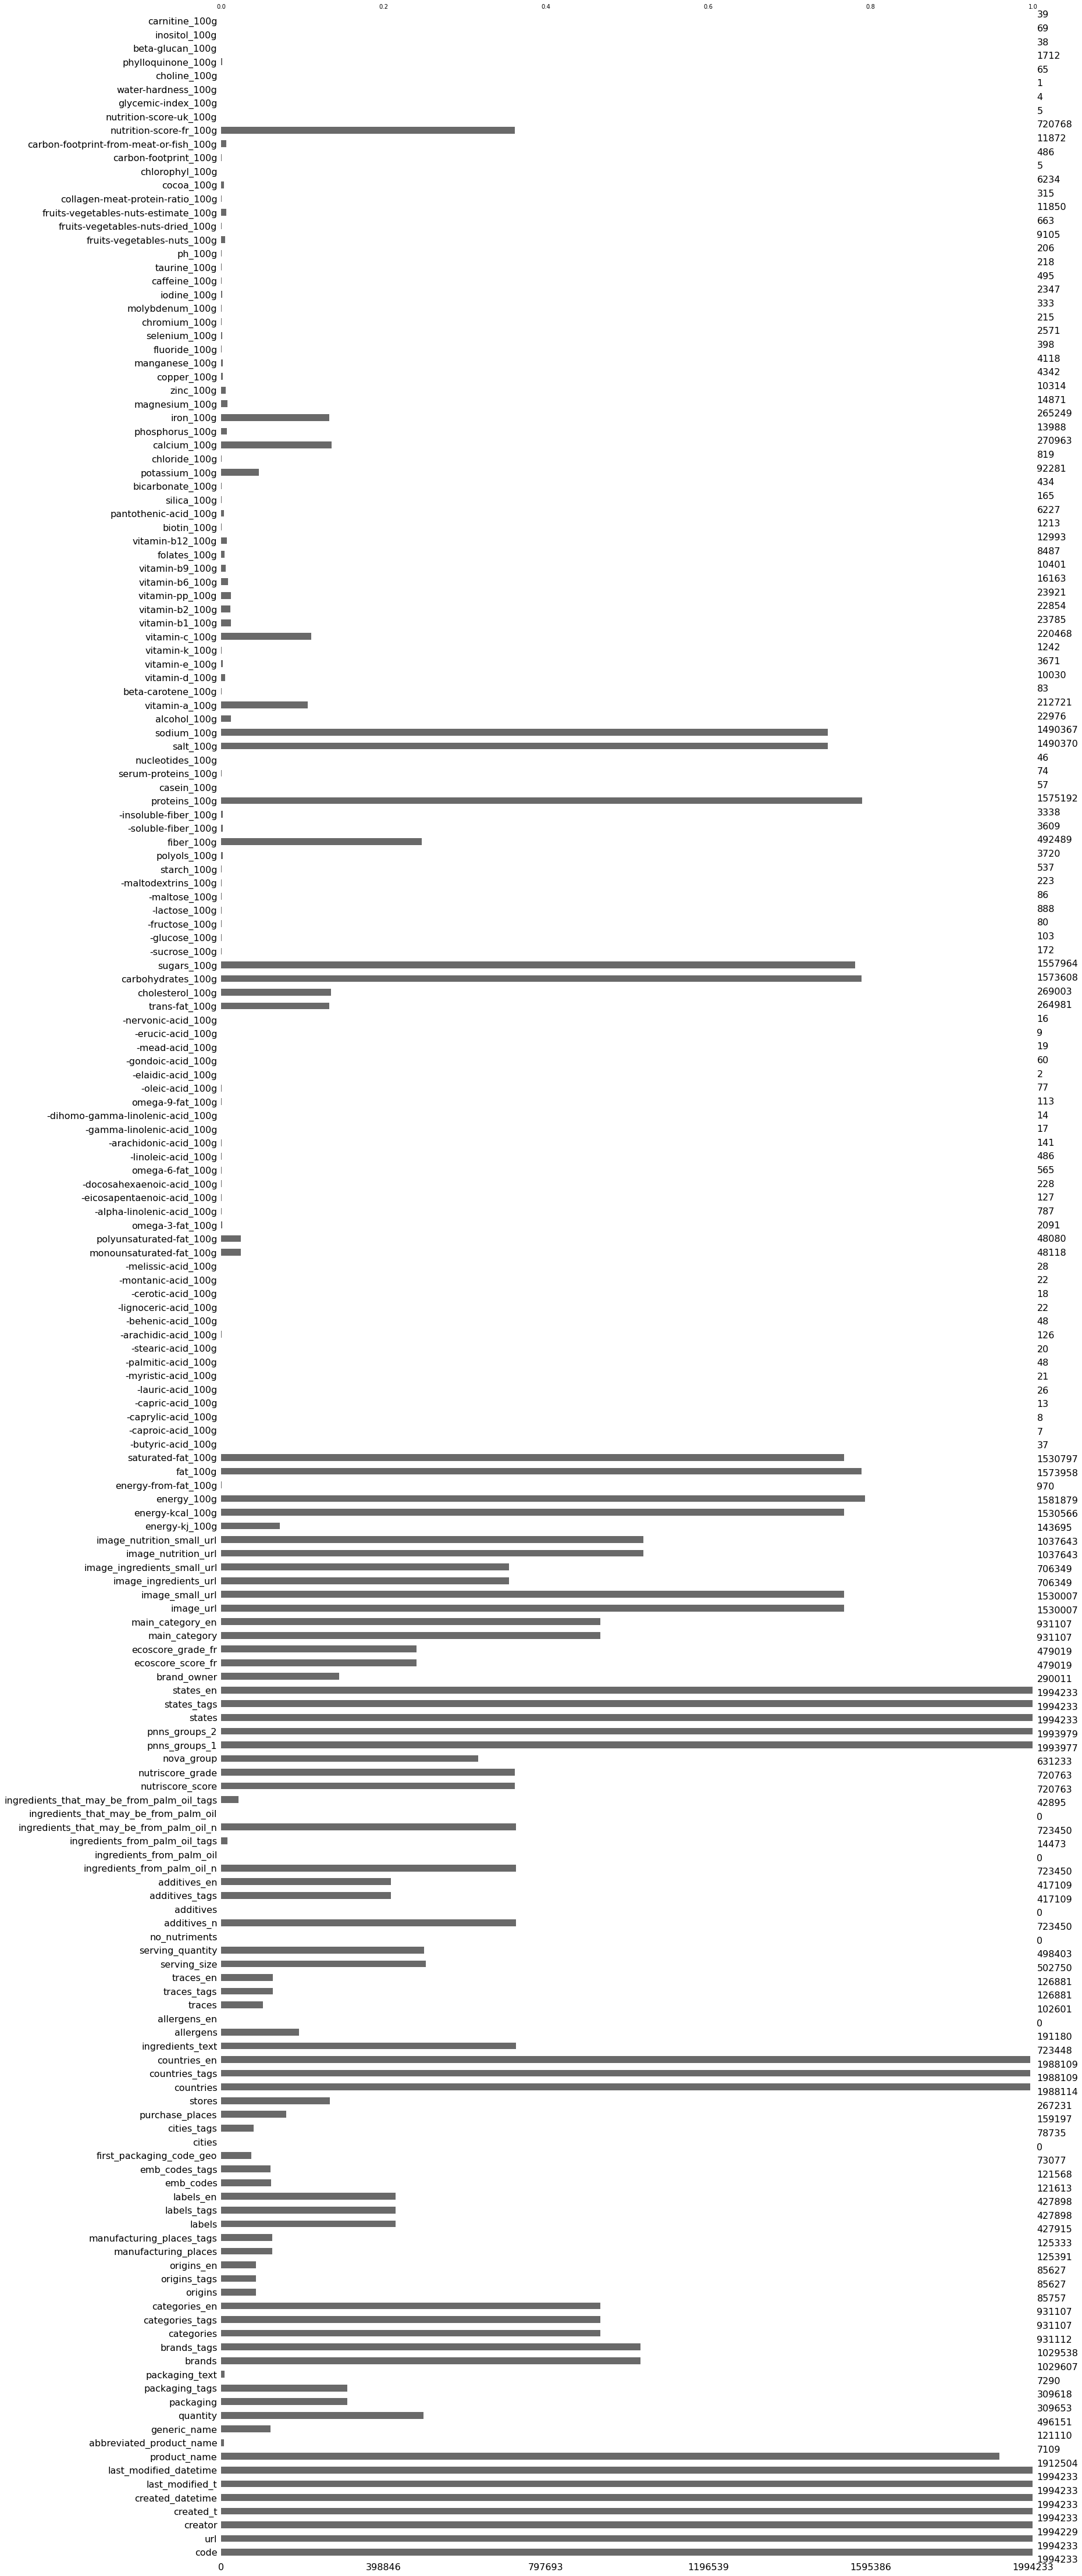

In [8]:
msno.bar(df)

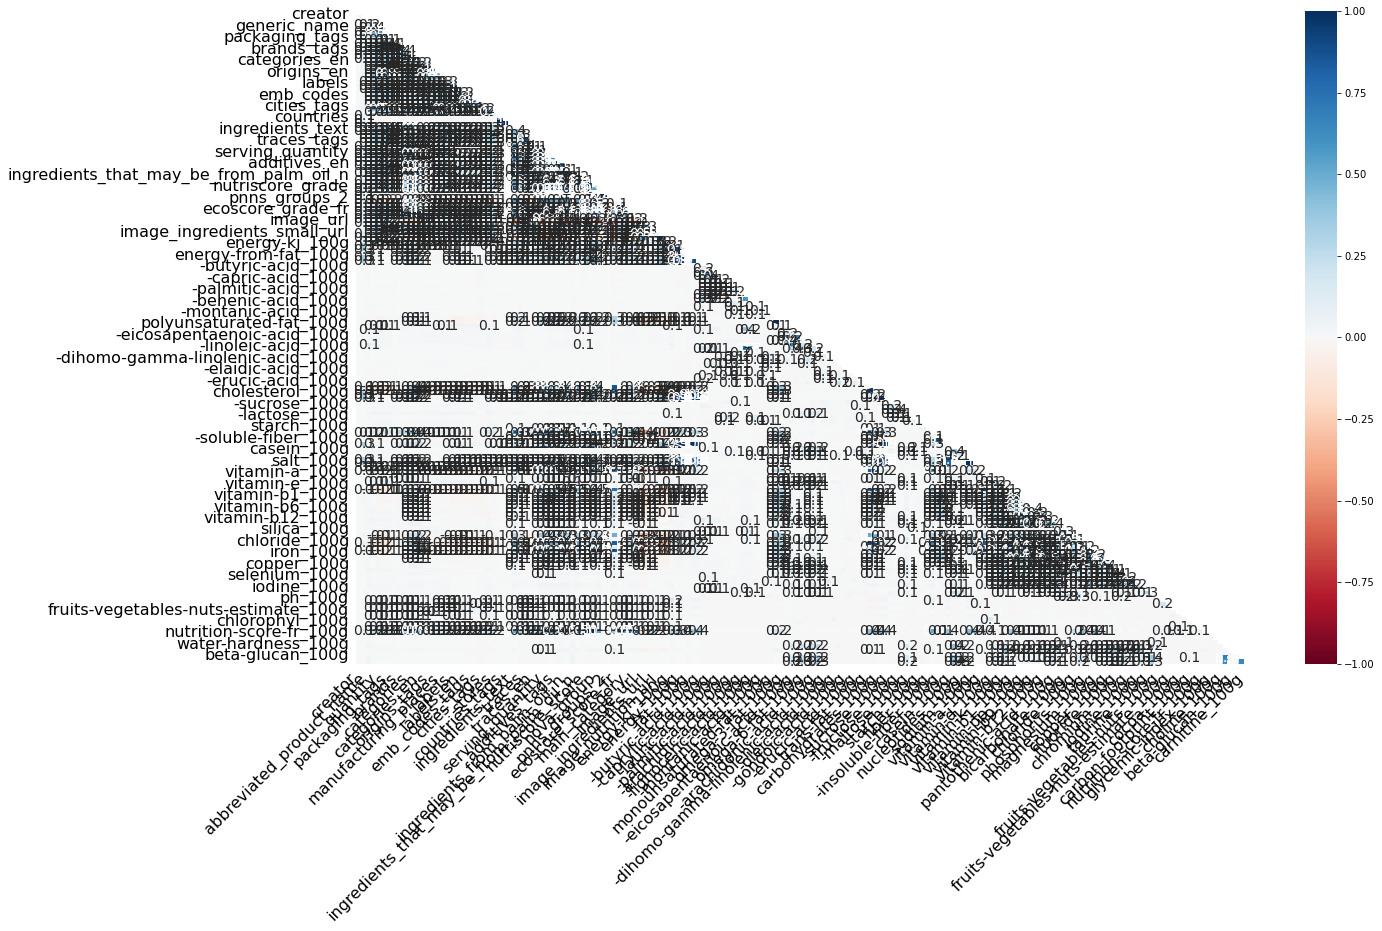

In [9]:
msno.heatmap(df)
plt.savefig('Heat Map of data')

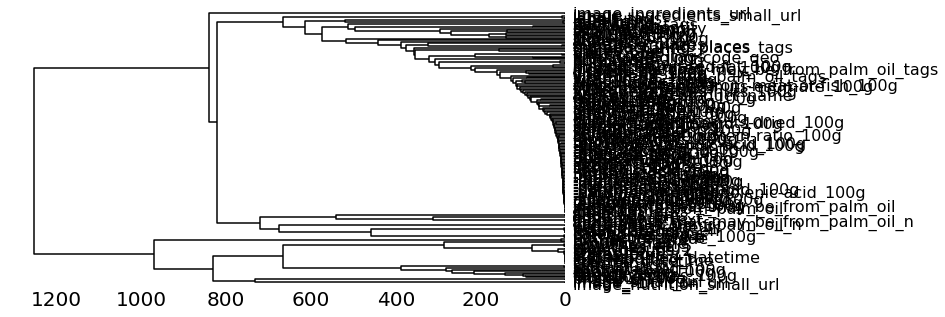

In [10]:
msno.dendrogram(df,figsize=(10, 5))
plt.savefig('dendrogram')

# <font color='red'> 2) 95% full data keeping columns

In [7]:
perc = 90.0 # Like N %
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1,  thresh=min_count)

# <font color='red'> 3) Select data we are going to work on</font> 

In [8]:
df = Product[[ "nova_group",'nutriscore_score' ,'nutriscore_grade','energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
                    'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 
                    'salt_100g', 'sodium_100g',"countries_en","additives_n",]] #,"cholesterol_100g","potassium_100g"

# <font color='red'>4) 90% full data keeping Rows

In [9]:
perc = 90 # Here N is 100
min_count =  int(((100-perc)/100)*df.shape[1] + 1)
df = df.dropna( axis=0, thresh=min_count)


# <font color='red'>5) Removing Duplicate

In [10]:
df= df.drop_duplicates()

# <font color='red'> 6) first level graphs</font>

<AxesSubplot:>

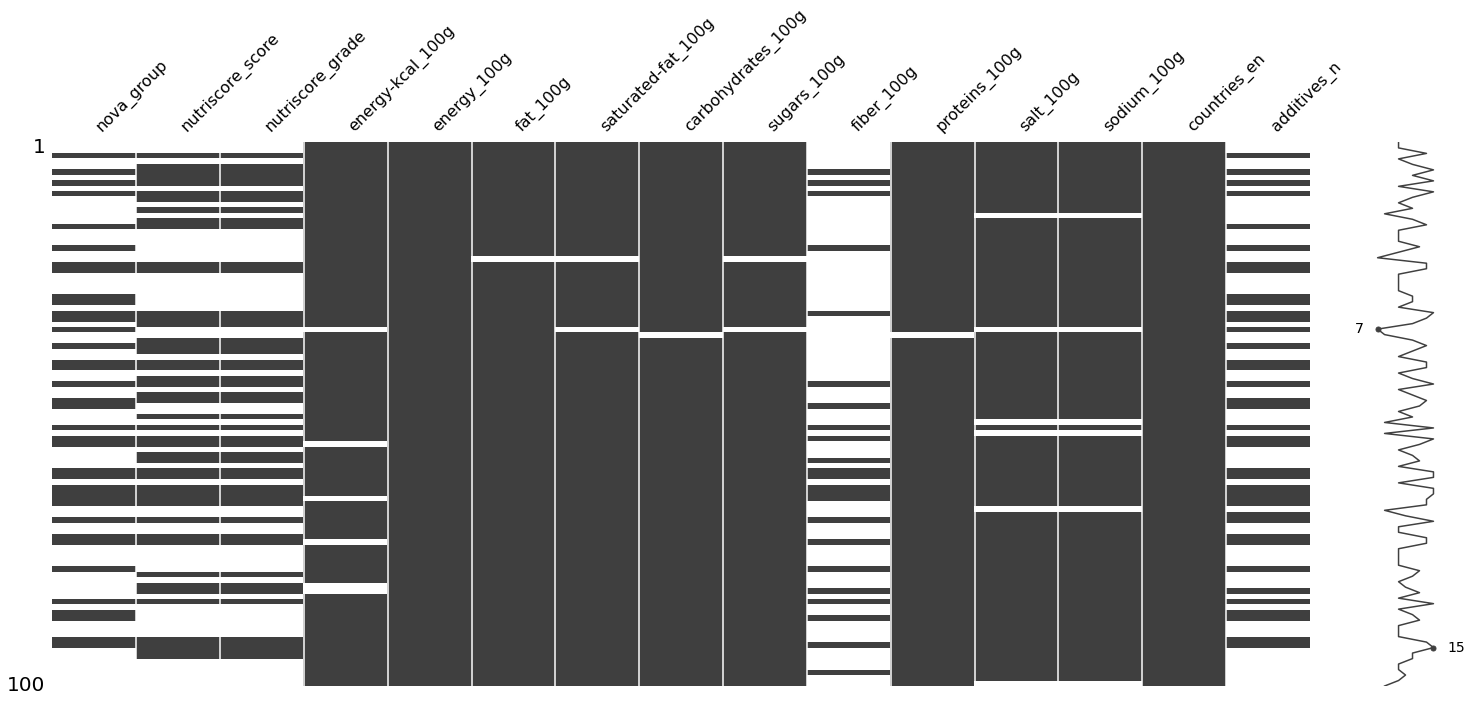

In [11]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(100))

<AxesSubplot:>

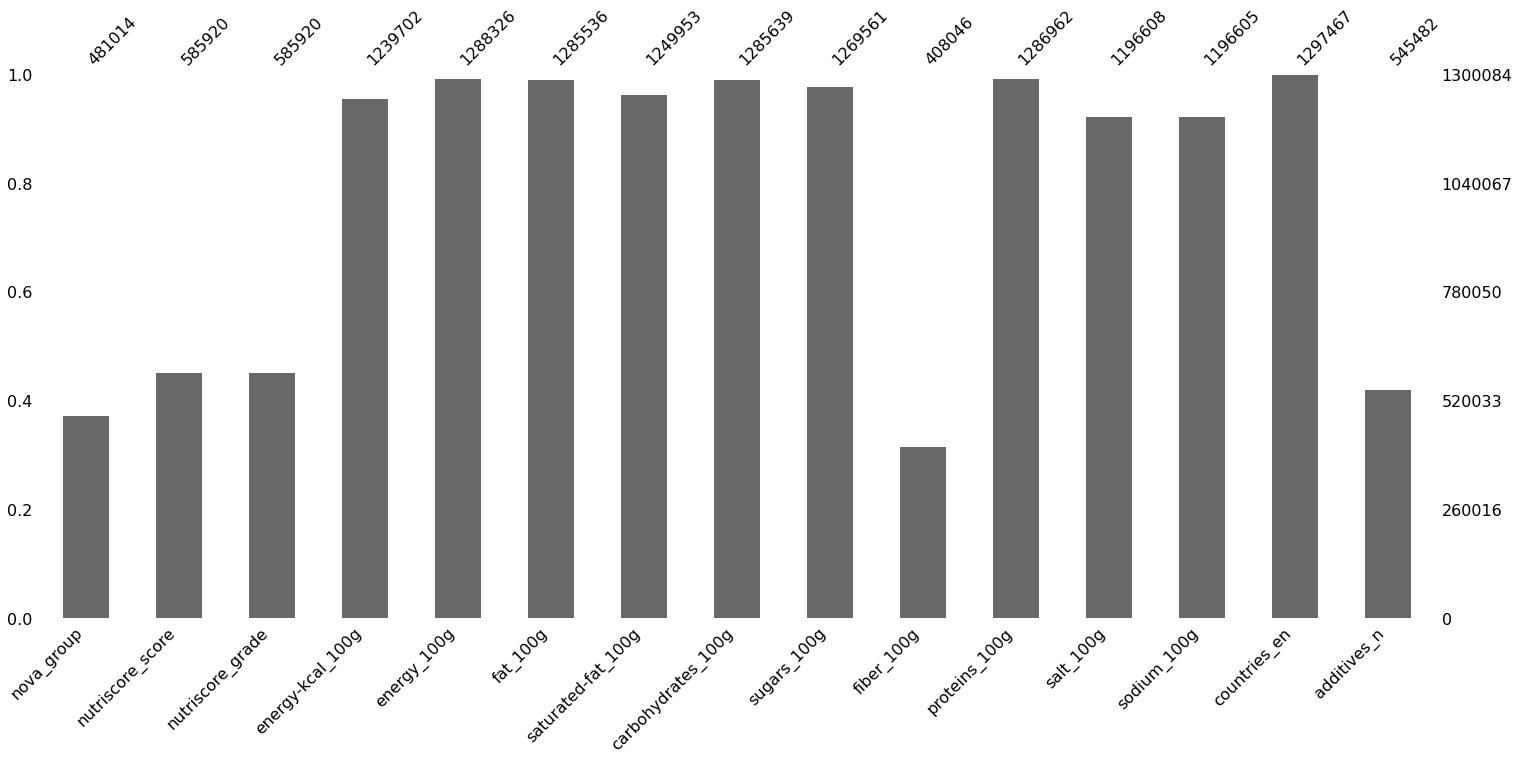

In [12]:
msno.bar(df)

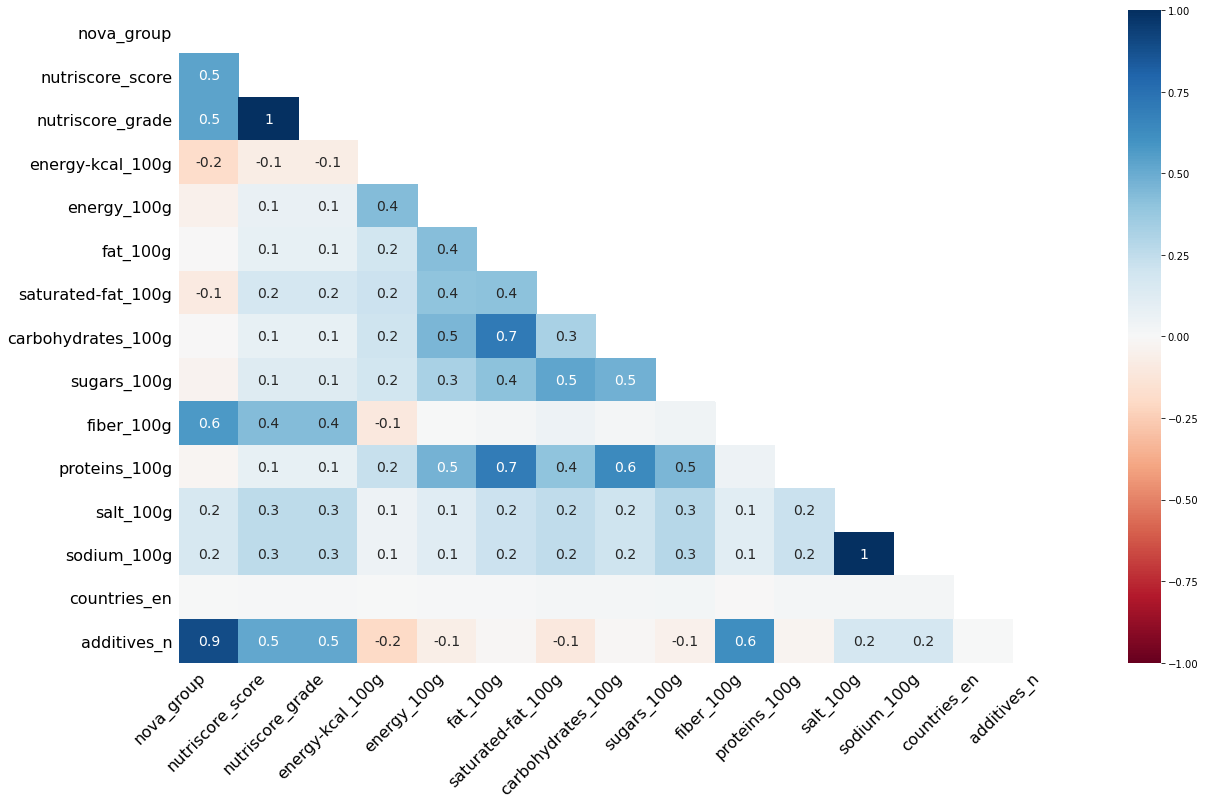

In [13]:
msno.heatmap(df)
plt.savefig('Heat Map of data')

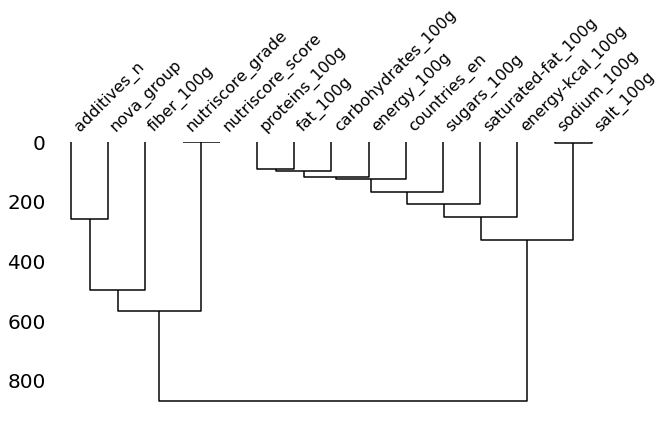

In [14]:
msno.dendrogram(df,figsize=(10, 5))
plt.savefig('dendrogram')

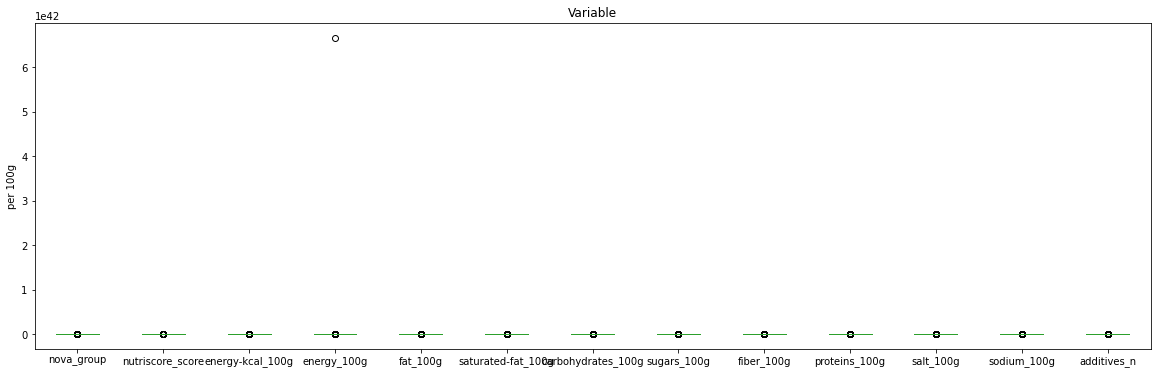

<Figure size 432x288 with 0 Axes>

In [15]:
df.plot(kind='box', figsize=(20, 6))
plt.title('Variable')
plt.ylabel('per 100g')

plt.show()
plt.savefig('Histogram before.jpg')

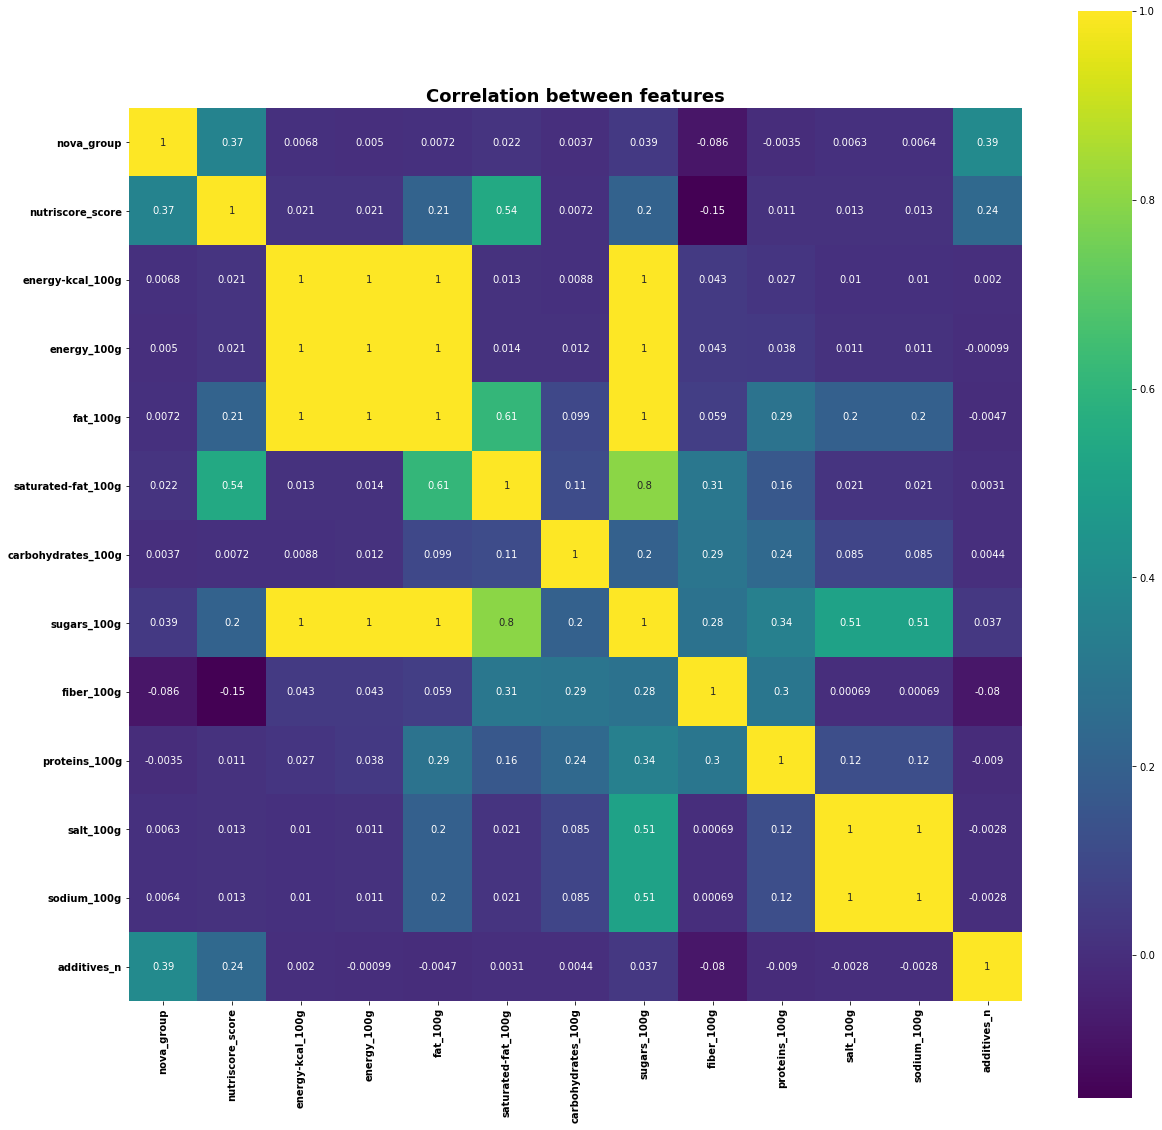

In [16]:
Products_corr=df.corr()

f,ax=plt.subplots(figsize=(20,20))

sns.heatmap(Products_corr, cmap='viridis', annot=True, square= True)

plt.title("Correlation between features", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.savefig('Heat Map Corrolation.jpg')
plt.show()


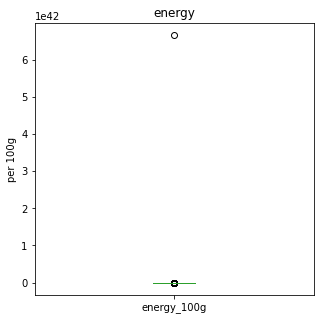

In [17]:
Energy= df["energy_100g"]
Energy.plot(kind='box', figsize=(5, 5))
plt.title('energy')
plt.ylabel('per 100g')
plt.savefig('virtual_energy')
plt.show()

In [18]:
df.loc[df['energy_100g'].idxmax()]

nova_group                                                      NaN
nutriscore_score                                                NaN
nutriscore_grade                                                NaN
energy-kcal_100g                                                NaN
energy_100g           6665558888888888950360610417759390841962496.0
fat_100g                                                        NaN
saturated-fat_100g                                              NaN
carbohydrates_100g                                              NaN
sugars_100g                                                     NaN
fiber_100g                                                      NaN
proteins_100g                                                   NaN
salt_100g                                                       NaN
sodium_100g                                                     NaN
countries_en                                               Bulgaria
additives_n                                     

# <font color='red'> 7) See outliers</font>

In [19]:
print(df.min())
print (df.max())
plt.savefig('Outlier.jpg')

nova_group              1.0
nutriscore_score      -15.0
energy-kcal_100g        0.0
energy_100g             0.0
fat_100g                0.0
saturated-fat_100g      0.0
carbohydrates_100g     -1.0
sugars_100g            -1.0
fiber_100g            -20.0
proteins_100g        -500.0
salt_100g               0.0
sodium_100g             0.0
additives_n             0.0
dtype: float64
nova_group            4.000000e+00
nutriscore_score      4.000000e+01
energy-kcal_100g      1.000000e+14
energy_100g           6.665559e+42
fat_100g              1.100000e+14
saturated-fat_100g    1.670000e+04
carbohydrates_100g    7.629390e+05
sugars_100g           1.000000e+14
fiber_100g            1.000000e+04
proteins_100g         7.300000e+04
salt_100g             1.340000e+05
sodium_100g           5.360000e+04
additives_n           4.900000e+01
dtype: float64


<Figure size 432x288 with 0 Axes>

In [20]:
df.loc[df['energy_100g'].idxmax()]

nova_group                                                      NaN
nutriscore_score                                                NaN
nutriscore_grade                                                NaN
energy-kcal_100g                                                NaN
energy_100g           6665558888888888950360610417759390841962496.0
fat_100g                                                        NaN
saturated-fat_100g                                              NaN
carbohydrates_100g                                              NaN
sugars_100g                                                     NaN
fiber_100g                                                      NaN
proteins_100g                                                   NaN
salt_100g                                                       NaN
sodium_100g                                                     NaN
countries_en                                               Bulgaria
additives_n                                     

In [21]:
print (df.min())
print (df.max())

nova_group              1.0
nutriscore_score      -15.0
energy-kcal_100g        0.0
energy_100g             0.0
fat_100g                0.0
saturated-fat_100g      0.0
carbohydrates_100g     -1.0
sugars_100g            -1.0
fiber_100g            -20.0
proteins_100g        -500.0
salt_100g               0.0
sodium_100g             0.0
additives_n             0.0
dtype: float64
nova_group            4.000000e+00
nutriscore_score      4.000000e+01
energy-kcal_100g      1.000000e+14
energy_100g           6.665559e+42
fat_100g              1.100000e+14
saturated-fat_100g    1.670000e+04
carbohydrates_100g    7.629390e+05
sugars_100g           1.000000e+14
fiber_100g            1.000000e+04
proteins_100g         7.300000e+04
salt_100g             1.340000e+05
sodium_100g           5.360000e+04
additives_n           4.900000e+01
dtype: float64


# <font color='red'> 8) filling Fiber from Nutri grade and Mean</font>

In [22]:
fibre_mean_df = pd.DataFrame(df.groupby('nutriscore_grade')['fiber_100g'].mean())

#df.groupby('nutriscore_grade')['nutriscore_grade'] == 'a'
def replace_null(x,mean):
    if np.isnan(x):
        return mean
    else:
        return x
a_mean = fibre_mean_df.loc['a','fiber_100g']
b_mean = fibre_mean_df.loc['b','fiber_100g']
c_mean = fibre_mean_df.loc['c','fiber_100g']
d_mean = fibre_mean_df.loc['d','fiber_100g']
e_mean = fibre_mean_df.loc['e','fiber_100g']

df.loc[df['nutriscore_grade'] == 'a','fiber_100g']= df[df['nutriscore_grade'] == 'a']['fiber_100g'].apply(lambda x :replace_null(x,a_mean))

df.loc[df['nutriscore_grade'] == 'b','fiber_100g']= df[df['nutriscore_grade'] == 'b']['fiber_100g'].apply(lambda x :replace_null(x,b_mean))

df.loc[df['nutriscore_grade'] == 'c','fiber_100g']= df[df['nutriscore_grade'] == 'c']['fiber_100g'].apply(lambda x :replace_null(x,c_mean))

df.loc[df['nutriscore_grade'] == 'd','fiber_100g']= df[df['nutriscore_grade'] == 'd']['fiber_100g'].apply(lambda x :replace_null(x,d_mean))

df.loc[df['nutriscore_grade'] == 'e','fiber_100g']= df[df['nutriscore_grade'] == 'e']['fiber_100g'].apply(lambda x :replace_null(x,e_mean))



In [23]:
df['fiber_100g'].isna().sum()

621210

# <font color='red'> 8.1) filling Addtive from Nova and Mean</font>

In [24]:
df['additives_n'].isna().sum()

754602

In [25]:
nova_group_df = pd.DataFrame(df.groupby('nova_group')['additives_n'].mean())

#df.groupby('nutriscore_grade')['nutriscore_grade'] == 'a'
def replace_null(x,mean):
    if np.isnan(x):
        return mean
    else:
        return x
a_mean = nova_group_df.loc[1,'additives_n']
b_mean = nova_group_df.loc[2,'additives_n']
c_mean = nova_group_df.loc[3,'additives_n']
d_mean = nova_group_df.loc[4,'additives_n']


df.loc[df['nova_group'] == 1,'additives_n']= df[df['nova_group'] == 1]['additives_n'].apply(lambda x :replace_null(x,a_mean))

df.loc[df['nova_group'] == 2,'additives_n']= df[df['nova_group'] == 2]['additives_n'].apply(lambda x :replace_null(x,b_mean))

df.loc[df['nova_group'] == 3,'additives_n']= df[df['nova_group'] == 3]['additives_n'].apply(lambda x :replace_null(x,c_mean))

df.loc[df['nova_group'] == 4,'additives_n']= df[df['nova_group'] == 4]['additives_n'].apply(lambda x :replace_null(x,d_mean))



In [26]:
df['additives_n'].isna().sum()

753658

# <font color='red'> 8.2) filling the NAN for the Column with Formulas

In [27]:
df['fat_100g'] = df.apply(
    lambda row: ((row['energy_100g']- (row['proteins_100g']*17)  - (row['carbohydrates_100g']*17)) /37 )
    if np.isnan(row['fat_100g']) 
    else row['fat_100g'], axis=1)

In [28]:
#worked 

In [29]:
fibre_mean_df = pd.DataFrame(df.groupby('nutriscore_grade')['fat_100g'].mean())

#df.groupby('nutriscore_grade')['nutriscore_grade'] == 'a'
def replace_null(x,mean):
    if np.isnan(x):
        return mean
    else:
        return x
a_mean = fibre_mean_df.loc['a','fat_100g']
b_mean = fibre_mean_df.loc['b','fat_100g']
c_mean = fibre_mean_df.loc['c','fat_100g']
d_mean = fibre_mean_df.loc['d','fat_100g']
e_mean = fibre_mean_df.loc['e','fat_100g']

df.loc[df['nutriscore_grade'] == 'a','fat_100g']= df[df['nutriscore_grade'] == 'a']['fat_100g'].apply(lambda x :replace_null(x,a_mean))

df.loc[df['nutriscore_grade'] == 'b','fat_100g']= df[df['nutriscore_grade'] == 'b']['fat_100g'].apply(lambda x :replace_null(x,b_mean))

df.loc[df['nutriscore_grade'] == 'c','fat_100g']= df[df['nutriscore_grade'] == 'c']['fat_100g'].apply(lambda x :replace_null(x,c_mean))

df.loc[df['nutriscore_grade'] == 'd','fat_100g']= df[df['nutriscore_grade'] == 'd']['fat_100g'].apply(lambda x :replace_null(x,d_mean))

df.loc[df['nutriscore_grade'] == 'e','fat_100g']= df[df['nutriscore_grade'] == 'e']['fat_100g'].apply(lambda x :replace_null(x,e_mean))


In [30]:
df['carbohydrates_100g'] = df.apply(
    lambda row: ((row['energy_100g']- (row['proteins_100g']*17)  - (row['fat_100g']*37)) /17 )
    if np.isnan(row['carbohydrates_100g']) 
    else row['carbohydrates_100g'], axis=1)

In [31]:
fibre_mean_df = pd.DataFrame(df.groupby('nutriscore_grade')['carbohydrates_100g'].mean())

#df.groupby('nutriscore_grade')['nutriscore_grade'] == 'a'
def replace_null(x,mean):
    if np.isnan(x):
        return mean
    else:
        return x
a_mean = fibre_mean_df.loc['a','carbohydrates_100g']
b_mean = fibre_mean_df.loc['b','carbohydrates_100g']
c_mean = fibre_mean_df.loc['c','carbohydrates_100g']
d_mean = fibre_mean_df.loc['d','carbohydrates_100g']
e_mean = fibre_mean_df.loc['e','carbohydrates_100g']

df.loc[df['nutriscore_grade'] == 'a','carbohydrates_100g']= df[df['nutriscore_grade'] == 'a']['carbohydrates_100g'].apply(lambda x :replace_null(x,a_mean))

df.loc[df['nutriscore_grade'] == 'b','carbohydrates_100g']= df[df['nutriscore_grade'] == 'b']['carbohydrates_100g'].apply(lambda x :replace_null(x,b_mean))

df.loc[df['nutriscore_grade'] == 'c','carbohydrates_100g']= df[df['nutriscore_grade'] == 'c']['carbohydrates_100g'].apply(lambda x :replace_null(x,c_mean))

df.loc[df['nutriscore_grade'] == 'd','carbohydrates_100g']= df[df['nutriscore_grade'] == 'd']['carbohydrates_100g'].apply(lambda x :replace_null(x,d_mean))

df.loc[df['nutriscore_grade'] == 'e','carbohydrates_100g']= df[df['nutriscore_grade'] == 'e']['carbohydrates_100g'].apply(lambda x :replace_null(x,e_mean))


In [32]:
#Not worked

In [33]:
df['proteins_100g'] = df.apply(
    lambda row: ((row['energy_100g']- (row['carbohydrates_100g']*17)  - (row['fat_100g']*37)) /17 )
    if np.isnan(row['proteins_100g']) 
    else row['proteins_100g'], axis=1)

In [34]:
df['sodium_100g'] = df.apply(
    lambda row: row['salt_100g']/2.5 
    if np.isnan(row['sodium_100g']) 
    else row['sodium_100g'],
    axis=1
)

In [35]:
# Not worked

In [36]:
df['salt_100g'] = df.apply(
    lambda row: row['sodium_100g']* 2.5 
    if np.isnan(row['salt_100g']) 
    else row['salt_100g'],
    axis=1
)

In [37]:
# Not worked

In [38]:
# a*a1+b*b1+c*c1+d*d1= e
df['energy_100g'] = df.apply(
    lambda row: row['carbohydrates_100g']*17 + row['proteins_100g']*17 +row['fat_100g']*37 
    if np.isnan(row['energy_100g']) 
    else row['energy_100g'],
    axis=1
)

In [39]:
#worked

In [40]:
df['energy-kcal_100g'] = df.apply(
    lambda row: row['energy_100g']/ 4.184 
    if np.isnan(row['energy-kcal_100g']) 
    else row['energy-kcal_100g'],
    axis=1
)

In [41]:
# worked

In [42]:
fibre_mean_df = pd.DataFrame(df.groupby('nutriscore_grade')['sodium_100g'].mean())

#df.groupby('nutriscore_grade')['nutriscore_grade'] == 'a'
def replace_null(x,mean):
    if np.isnan(x):
        return mean
    else:
        return x
a_mean = fibre_mean_df.loc['a','sodium_100g']
b_mean = fibre_mean_df.loc['b','sodium_100g']
c_mean = fibre_mean_df.loc['c','sodium_100g']
d_mean = fibre_mean_df.loc['d','sodium_100g']
e_mean = fibre_mean_df.loc['e','sodium_100g']

df.loc[df['nutriscore_grade'] == 'a','sodium_100g']= df[df['nutriscore_grade'] == 'a']['sodium_100g'].apply(lambda x :replace_null(x,a_mean))

df.loc[df['nutriscore_grade'] == 'b','sodium_100g']= df[df['nutriscore_grade'] == 'b']['sodium_100g'].apply(lambda x :replace_null(x,b_mean))

df.loc[df['nutriscore_grade'] == 'c','sodium_100g']= df[df['nutriscore_grade'] == 'c']['sodium_100g'].apply(lambda x :replace_null(x,c_mean))

df.loc[df['nutriscore_grade'] == 'd','sodium_100g']= df[df['nutriscore_grade'] == 'd']['sodium_100g'].apply(lambda x :replace_null(x,d_mean))

df.loc[df['nutriscore_grade'] == 'e','sodium_100g']= df[df['nutriscore_grade'] == 'e']['sodium_100g'].apply(lambda x :replace_null(x,e_mean))


# <font color='red'>  9) Create Virutal

In [43]:
df['proteins_100g_virtual'] = df.apply(
    lambda row: 100- row['fat_100g']  -row['carbohydrates_100g']- row['sodium_100g']
    #- row['potassium_100g']- row['cholesterol_100g']
    if np.isnan(row['proteins_100g']) 
    else row['proteins_100g'],
    axis=1
)

In [44]:
df["virtual_energy"]=df.apply(
    lambda row: (row.proteins_100g)*17 + (row.carbohydrates_100g)*17+ (row.fat_100g)*37, axis=1)

In [45]:
df["Total_grams"]=df.apply(lambda row: row.proteins_100g + row.carbohydrates_100g+ row.fat_100g +row.salt_100g , axis=1)
# +  row.cholesterol_100g +row.potassium_100g

# <font color='red'>  9.1) replace actual with Virtual

In [46]:
# i am building if row is bigger by 10% it will replace the amount with the Virtual data
def replace_proteins_100g(energy,virtual):
    if (np.isnan(energy) or  np.isnan(virtual)):
        return np.nan
    elif(energy < (virtual*0.9)):
        return virtual
    elif(energy > (virtual*0.9)):
        return virtual
    else:
        return energy
    

df['proteins_100g'] = df.apply(lambda row: replace_proteins_100g(row['proteins_100g'],row['proteins_100g_virtual']),axis = 1)

In [47]:
# i am building if row is bigger by 10% it will replace the amount with the Virtual data
def replace_energy(energy,virtual):
    if (np.isnan(energy) or  np.isnan(virtual)):
        return np.nan
    elif(energy < (virtual*0.9)):
        return virtual
    elif(energy > (virtual*0.9)):
        return virtual
    else:
        return energy
    

df['energy_100g'] = df.apply(lambda row: replace_energy(row['energy_100g'],row['virtual_energy']),axis = 1)

# <font color='red'> 10) Arbitration

In [48]:
df.drop(df[df['energy-kcal_100g'] > 900].index, inplace = True)# that is the higest in calories in a product
df.drop(df[df['fat_100g'] > 100].index, inplace = True)
df.drop(df[df['saturated-fat_100g'] > 100].index, inplace = True)
df.drop(df[df['carbohydrates_100g'] > 100].index, inplace = True)
df.drop(df[df['sugars_100g'] > 100].index, inplace = True)
df.drop(df[df['proteins_100g'] > 100].index, inplace = True)
df.drop(df[df['salt_100g'] > 100].index, inplace = True)
df.drop(df[df['energy_100g'] > 3780].index, inplace = True) # this is alined with Kcal * 4.18
df.drop(df[df['fiber_100g'] > 100].index, inplace = True) 
df.drop(df[df['sodium_100g'] > 40].index, inplace = True) # because we can't have more than 39 in a 100g

df.drop(df[df['fat_100g'] <= 0].index, inplace = True)
df.drop(df[df['carbohydrates_100g'] <= 0].index, inplace = True)
df.drop(df[df['sugars_100g'] <= 0].index, inplace = True)
df.drop(df[df['salt_100g'] <= 0].index, inplace = True)
df.drop(df[df['saturated-fat_100g'] <= 0].index, inplace = True)
df.drop(df[df['energy-kcal_100g'] <= 0].index, inplace = True)
df.drop(df[df['proteins_100g'] <= 0].index, inplace = True)
df.drop(df[df['energy_100g'] <= 0].index, inplace = True)
df.drop(df[df['Total_grams'] > 100].index, inplace = True)
df.drop(df[df['Total_grams'] <= 0].index, inplace = True)
df.drop(df[df['sodium_100g'] <= 0].index, inplace = True)
df.drop(df[df['fiber_100g']  <=0].index, inplace = True) 

df.drop(df[df['Total_grams'] > 100].index, inplace = True)
df.drop(df[df['Total_grams'] <= 0].index, inplace = True)
    

# <font color='red'> 11) Filling Variable for Nutri Score</font> 

In [49]:
def conditions(x):
    if np.isnan(x):
        return np.nan
    elif (x <= 4.5):
        return 0
    elif (x > 4.5 and x<=9):
        return 1
    elif (x > 9 and x<=13.5):
        return 2
    elif (x >13.5 and x<=18):
        return 3
    elif (x >18 and x<=22.5):
        return 4
    elif (x >22.5 and x<=27):
        return 5
    elif (x >27 and x<=31):
        return 6
    elif (x >31 and x<=36):
        return 7
    elif (x >36 and x<=40):
        return 8
    elif (x >40 and x<=45):
        return 9
    else:
        return 10
    

df['sugars_100g_N'] = df['sugars_100g'].apply(lambda x : conditions(x))


In [50]:
def conditions(x):
    if(np.isnan(x)):
        return np.nan 
    elif(x <= 335):
        return 0
    elif(x > 335) & (x <= 670):
        return 1
    elif(x > 670) & (x <= 1005):
        return 2
    elif(x > 1005) & (x <= 1340):
        return 3
    elif(x > 1340) & (x <= 1675):
        return 4
    elif(x > 1675) & (x <= 2010):
        return 5
    elif(x > 2010) & (x <= 2345):
        return 6
    elif(x > 2345) & (x <= 2680):
        return 7
    elif(x > 2680) & (x <= 3015):
        return 8
    elif(x > 3015) & (x <= 3350):
        return 9
    else:
        return 10
    

df['energy_100g_N'] = df['energy_100g'].apply(lambda x : conditions(x))


In [51]:
def conditions(x):
    if(np.isnan(x)):
        return np.nan
    elif(x <= 1):
        return 0
    elif(x > 1) & (x <= 2):
        return 1
    elif(x > 2) & (x <= 3):
        return 2
    elif(x > 3) & (x <= 4):
        return 3
    elif(x > 4) & (x <= 5):
        return 4
    elif(x > 5) & (x <= 6):
        return 5
    elif(x > 6) & (x <= 7):
        return 6
    elif(x > 7) & (x <= 8):
        return 7
    elif(x > 8) & (x <= 9):
        return 8
    elif(x > 9) & (x <= 10):
        return 9
    else:
        return 10

df['saturated-fat_100g_N'] = df['saturated-fat_100g'].apply(lambda x : conditions(x))


In [52]:
def conditions(x):
    if(np.isnan(x)):
        return np.nan
    elif(x <= 0.090):
        return 0 
    elif(x > 0.090 and x <= 0.180):
        return 1
    elif(x > 0.180 and x <= 0.270):
        return 2
    elif(x > 0.270 and x <= 0.360):
        return 3
    elif(x > 0.360 and x <= 0.450):
        return 4
    elif(x > 0.450 and x <= 0.540):
        return 5
    elif(x > 0.540 and x <= 0.630):
        return 6
    elif(x > 0.630 and x <=0.720):
        return 7
    elif(x > 0.720 and x <= 0.810):
        return 8
    elif(x > 0.810 and x <= 0.900):
        return 9
    else:
        return 10

df['sodium_100g_N'] = df['sodium_100g'].apply(lambda x : conditions(x))


In [53]:
def conditions(x):
    if np.isnan(x):
        return np.nan
    elif (x >0 and x<=1.6):
        return 0
    elif (x > 1.6 and x<=3.2):
        return 1
    elif (x > 3.2 and x<=4.8):
        return 2
    elif (x >4.8 and x<=6.4):
        return 3
    elif (x >6.4 and x<=8):
        return 4
    else:
        return 5
    
p = df['proteins_100g']

df['proteins_100g_N'] = df['proteins_100g'].apply(lambda x : conditions(x))


In [54]:
def conditions(x):
    if np.isnan(x):
        return np.nan
    elif (x >0 and x<=0.9):
        return 0
    elif (x > 0.9 and x<=1.9):
        return 1
    elif (x > 1.9 and x<=2.8):
        return 2
    elif (x >2.8 and x<=3.7):
        return 3
    elif (x >3.7 and x<=4.7):
        return 4
    else:
        return 5
    
p = df['fiber_100g']

df['fiber_100g_N'] = df['fiber_100g'].apply(lambda x : conditions(x))

In [55]:
def nutri_score(e,su,so,sa,po): #,fi
    if((np.isnan(e)) or (np.isnan(su)) or (np.isnan(so)) or (np.isnan(sa)) or (np.isnan(po)) ): #or (np.isnan(fi))
        return np.nan
    else:
        return (e + su +so+sa-po  -3) #-fi 
    # I have removed Fiber because my PC is not albe to manage a KNNimputer of that size
    
df['nutriscore_score'] = df.apply(
    lambda row :nutri_score(row['energy_100g_N'] , row['sugars_100g_N'] , 
                            row['sodium_100g_N'] , row['saturated-fat_100g_N'] , 
                            row['proteins_100g_N']),axis = 1)  #     ,row['fiber_100g_N']

In [56]:
def conditions(x):
    if np.isnan(x):
        return np.nan
    elif ( x<=-1):
        return "a"
    elif (x > -1 and x<=2):
        return "b"
    elif (x > 2 and x<=10):
        return "c"
    elif (x >10 and x<=18):
        return "d"
    else:
        return "e"
    



In [ ]:
df['nutriscore_grade'] = df['nutriscore_score'].apply(lambda x : conditions(x))

In [57]:
conditions = [
    (df['nutriscore_score'].isna()),
    (df['nutriscore_score'] <= -1),
    (df['nutriscore_score'] >= 0) & (df['nutriscore_score'] <= 2),
    (df['nutriscore_score'] >= 3) & (df['nutriscore_score'] <= 10),
    (df['nutriscore_score'] >= 11) & (df['nutriscore_score'] <= 18),
    (df['nutriscore_score'] >= 19) & (df['nutriscore_score'] <= 40)
    ]
values = [np.NaN,"a", "b", "c", "d","e"]
df['nutriscore_grade'] = np.select(conditions, values)
df.head()

,nova_group,nutriscore_score,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,...,additives_n,proteins_100g_virtual,virtual_energy,Total_grams,sugars_100g_N,energy_100g_N,saturated-fat_100g_N,sodium_100g_N,proteins_100g_N,fiber_100g_N
1,NaN,-2.0,a,63.169216,264.3,1.4,0.90,9.800000,9.8,NaN,...,0.0,2.7,264.3,14.000000,2.0,0.0,0.0,0.0,1.0,NaN
2,NaN,9.0,c,375.000000,1583.3,7.0,3.08,70.100000,15.0,NaN,...,NaN,7.8,1583.3,86.300000,3.0,4.0,3.0,6.0,4.0,NaN
4,NaN,NaN,nan,163.900000,685.8,1.9,1.00,20.905882,NaN,NaN,...,NaN,15.3,685.8,39.205882,NaN,2.0,0.0,4.0,5.0,NaN
5,NaN,9.0,c,874.900000,869.8,15.1,6.10,2.600000,1.0,NaN,...,NaN,15.7,869.8,35.500000,0.0,2.0,6.0,9.0,5.0,NaN
9,NaN,1.0,b,60.000000,315.0,3.0,1.00,10.000000,3.0,NaN,...,NaN,2.0,315.0,16.150000,0.0,0.0,0.0,5.0,1.0,NaN


In [58]:
df.shape

(820441, 24)

# <font color='red'> 12) Graph After Basic cleaning

In [59]:
df.to_csv('Check_point1.csv',index = False)

In [60]:
#df = pd.read_csv('Check_point1.csv')
df.to_csv('Check_point1.csv',index = False)

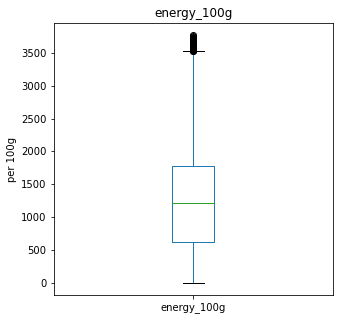

In [61]:
Energy= df [[ "energy_100g"]]
Energy.plot(kind='box', figsize=(5, 5))
plt.title('energy_100g')
plt.ylabel('per 100g')
plt.savefig('energy_100g2')
plt.show()

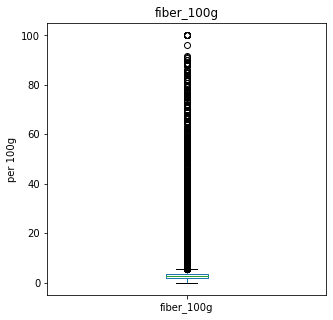

In [62]:
Energy= df [[ "fiber_100g"]]
Energy.plot(kind='box', figsize=(5, 5))
plt.title('fiber_100g')
plt.ylabel('per 100g')
#plt.savefig('energy_100g2')
plt.show()

In [63]:
Energy= df [[ "energy-kcal_100g","energy_100g","virtual_energy"]]


# <font color='red'> 12.1) Filtering to more important Colomns

In [64]:
Energy= df [[ "energy-kcal_100g","energy_100g","virtual_energy"]]
REST= df.drop([ "energy-kcal_100g","energy_100g","virtual_energy"], axis=1)

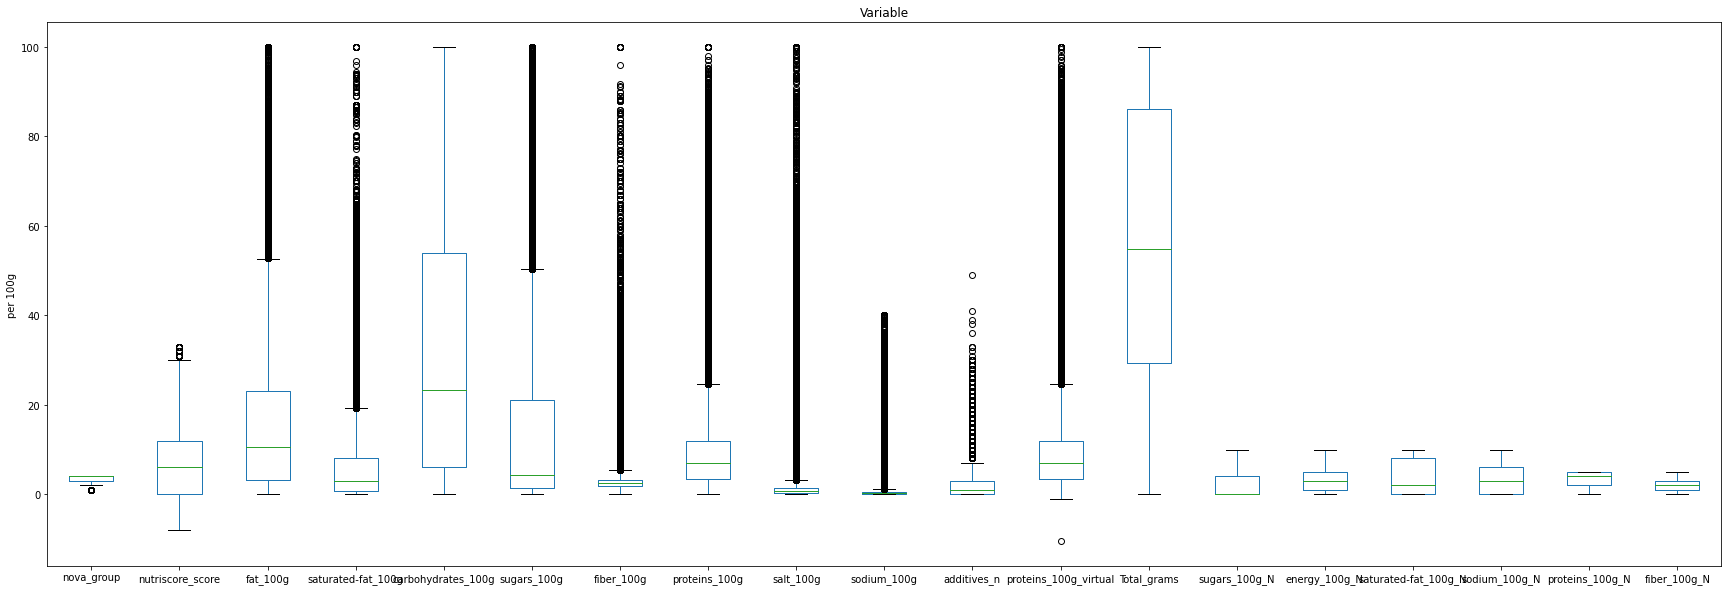

In [65]:
# have to drop the energy and calories because the number are just to high and we can't see the result of the others
REST.plot(kind='box', figsize=(30, 10))
plt.title('Variable')
plt.ylabel('per 100g')
plt.savefig('Box PLot before1')
plt.show()

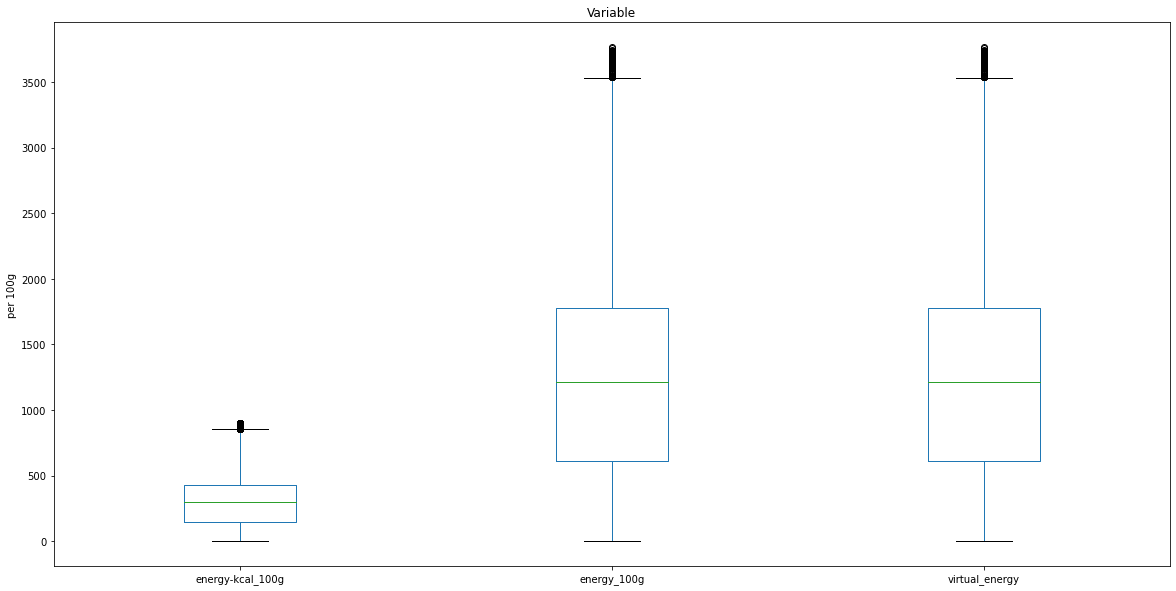

In [66]:
# have to drop the energy and calories because the number are just to high and we can't see the result of the others
Energy.plot(kind='box', figsize=(20, 10))
plt.title('Variable')
plt.ylabel('per 100g')
plt.savefig('Box PLot before2')
plt.show()

In [67]:
df= df.drop(["proteins_100g_N","fiber_100g_N","energy-kcal_100g","Total_grams","sugars_100g_N","energy_100g_N","saturated-fat_100g_N","sodium_100g_N","Total_grams","virtual_energy","fiber_100g_N","proteins_100g_virtual"], axis=1)

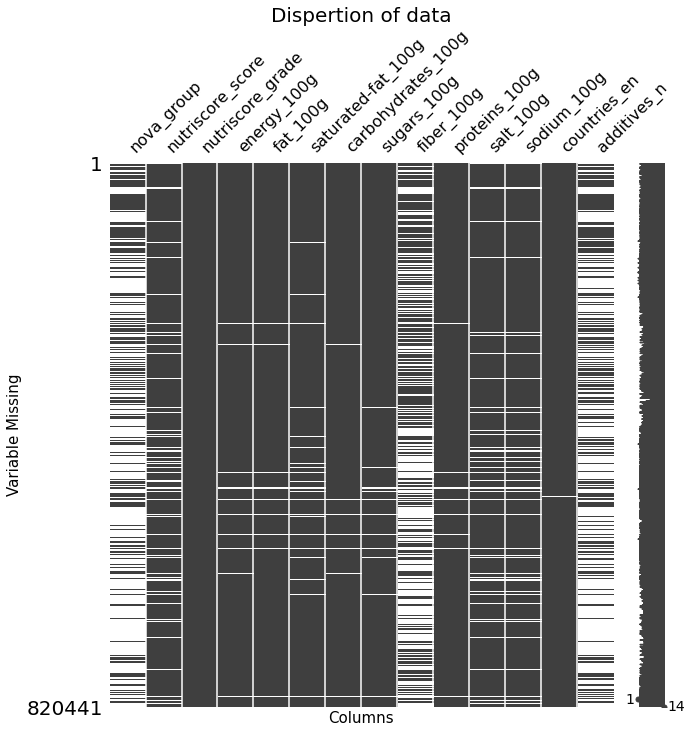

In [68]:
msno.matrix(df, figsize=(10, 10))
plt.title('Dispertion of data', fontsize = 20) # title with fontsize 20
plt.xlabel('Columns', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Variable Missing', fontsize = 15) # y-axis label with fontsize 15
plt.savefig('Dispertion of data')

Text(0.5, 1.0, 'Avaible Data')

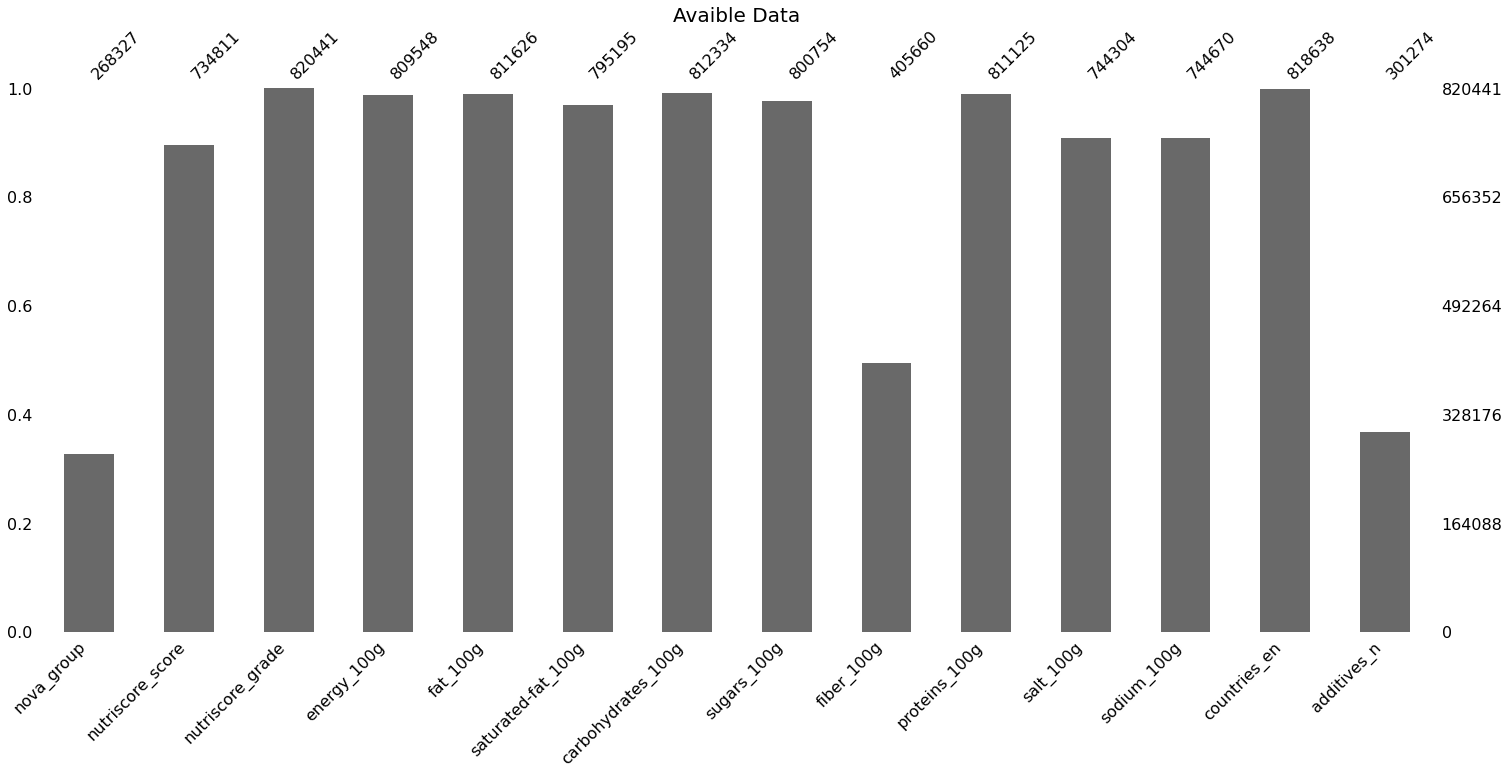

In [69]:
sorted_data = msno.nullity_sort(df, sort='descending' )# or sort='ascending'
msno.bar(sorted_data)
plt.title('Avaible Data', fontsize = 20) # title with fontsize 20
#plt.xlabel('Years', fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel('', fontsize = 15) # y-axis label with fontsize 15
#plt.savefig('Avaible Data')

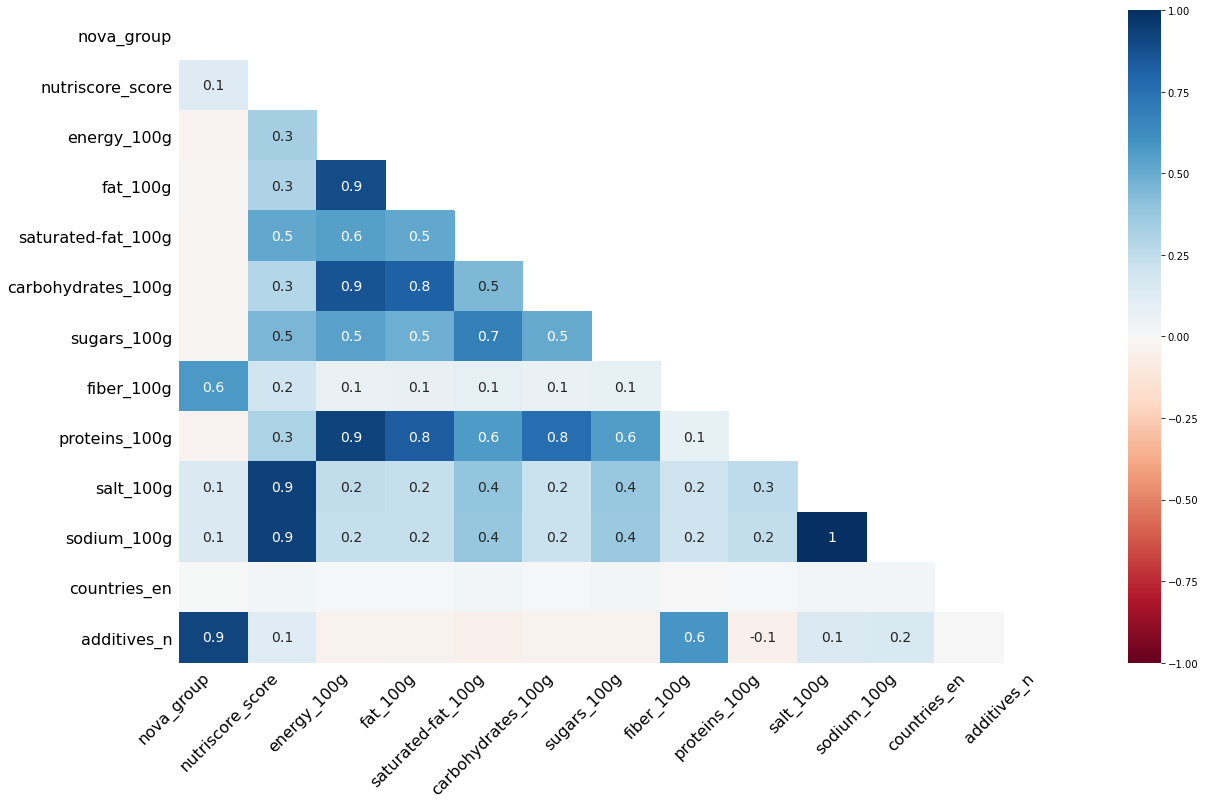

In [70]:
msno.heatmap(df)
plt.savefig('Heat Map of data')

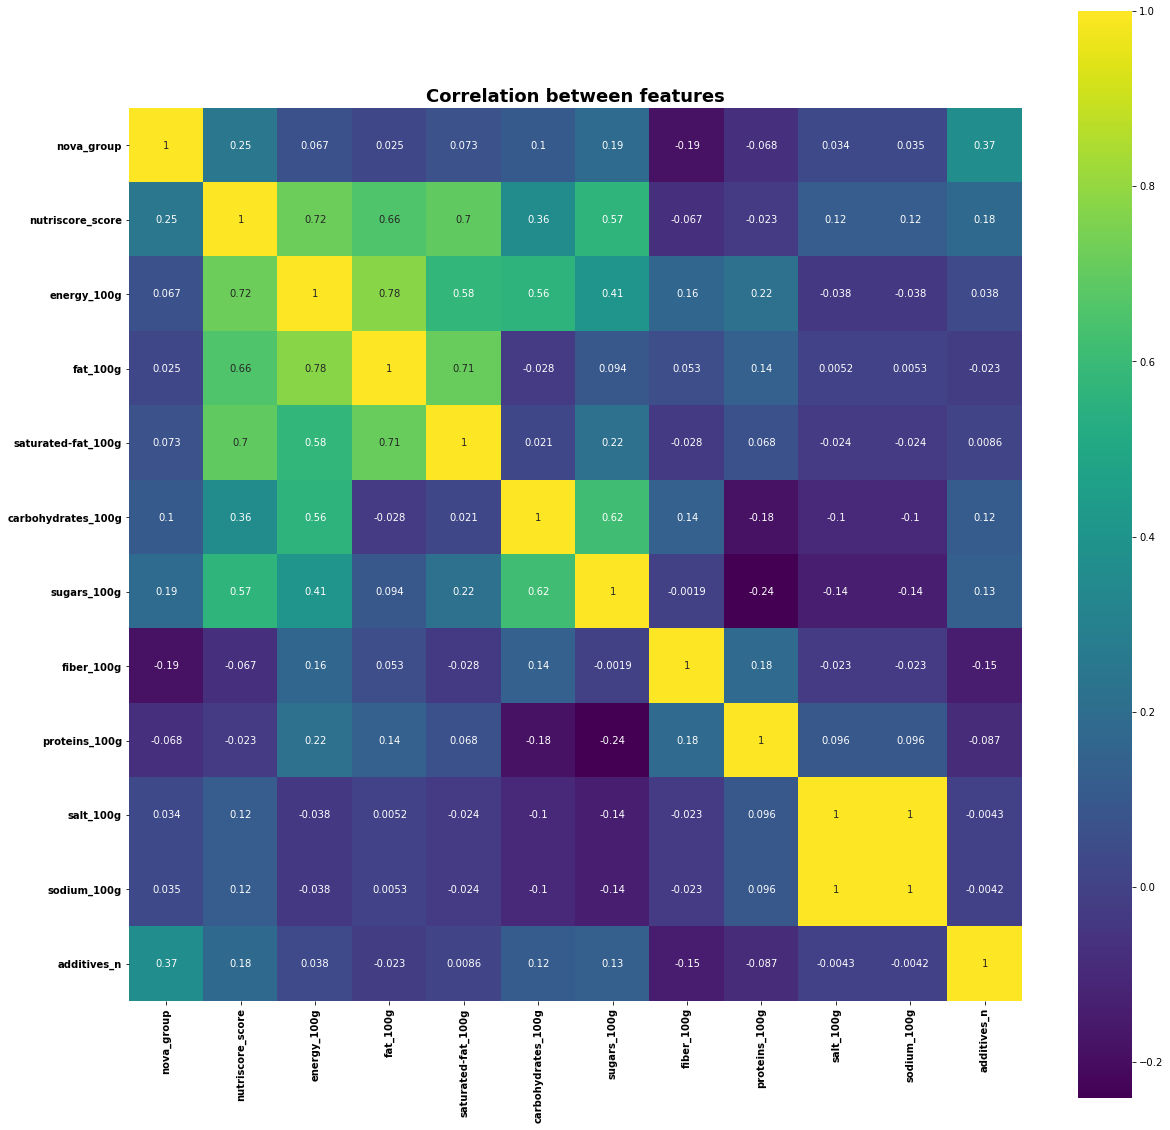

In [71]:
Products_corr=df.corr()

f,ax=plt.subplots(figsize=(20,20))

sns.heatmap(Products_corr, cmap='viridis', annot=True, square= True)

plt.title("Correlation between features", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.savefig('Heat Map Corrolation.jpg')
plt.show()


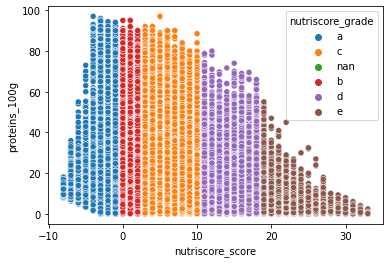

In [72]:
#bimodal
#print(df['nutriscore_score'].shape,df['proteins_100g'].shape,df['nutriscore_grade'].shape)
sns.scatterplot(x = 'nutriscore_score', y = 'proteins_100g',data =df,hue="nutriscore_grade")
plt.show()

In [73]:
df.shape

(820441, 14)

# <font color='red'> 13) KNN

#### due to to issues from my computer . I will not be able to preform the KNN Imputer on my PC again. it seems something went wrong and my Pc is not longer able to manage big amount of DATA it's alwyas giving me a different result on the same Data and other times it just doesn't finish computing even after 5 hours

### I am still writing the whole code but the result will only be on 100% clean data

In [49]:
# see corolation with 100% clean data

In [76]:
dfK= df.drop(["countries_en","nova_group","additives_n"], axis=1)
dfK = dfK.dropna( axis=0)
Test=df.dropna(axis=0)# [['additives_n',"nutriscore_grade","nova_group"]]
X = Test[['energy_100g',"saturated-fat_100g","sugars_100g"]]#,"sodium_100g","proteins_100g"
y = Test['nutriscore_grade']
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


In [77]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 5  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=5 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=5 is 0.7146181421773129


In [52]:
#df['nutriscore_grade'] = df['nutriscore_grade'].replace(['a','b','c','d','e'],[5,4,3,2,1])

In [78]:
#Test=df[['additives_n',"nutriscore_grade","nova_group"]].dropna(axis=0)
#Test['nutriscore_grade'] = df['nutriscore_grade'].replace(['a','b','c','d','e'],[5,4,3,2,1])
X = Test[['energy_100g',"fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","proteins_100g","sodium_100g"]].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = Test['nutriscore_grade'].values


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) # state=42 is the best random option
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (190800, 7) (190800,)
Test set: (47701, 7) (47701,)


In [80]:
k = 3 # because the K search said 3 was the best amount
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [81]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['c', 'a', 'c', 'd', 'a'], dtype=object)

In [82]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9606236897274633
Test set Accuracy:  0.9167522693444582


In [83]:
Ks = 10 # how many samples from 1 to 10 , it; s to much because we already know that 3 is the best option
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):  # why not (1,KS)?
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.91985493, 0.90494958, 0.91675227, 0.91222406, 0.9172554 ,
       0.91314647, 0.91708769, 0.91429949, 0.91633299])

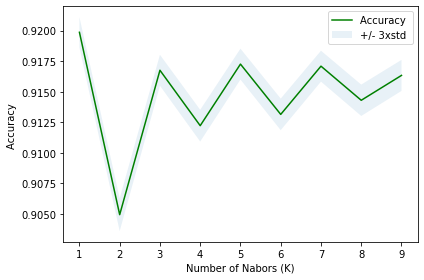

In [84]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

Minimum error:- 0.05824634939644262 at K = 0


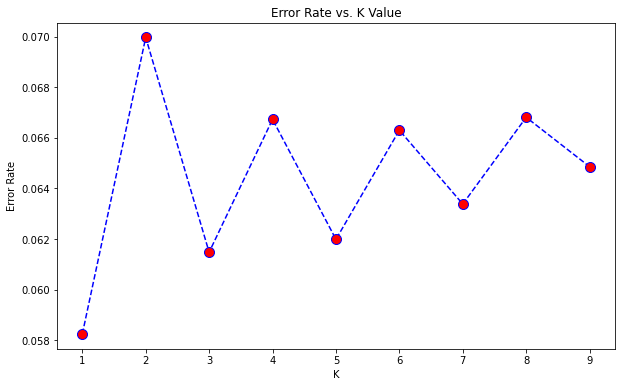

In [85]:
dfKNN=df[["nutriscore_grade","energy_100g","energy_100g","fat_100g",
          "saturated-fat_100g","carbohydrates_100g","sugars_100g",
          "proteins_100g","salt_100g","sodium_100g"]]
dfKNN=dfKNN.dropna( axis=0)
X = dfKNN.drop(['nutriscore_grade'], axis = 1)
y = dfKNN['nutriscore_grade']
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Text(0.5, 1.0, 'Avaible Data')

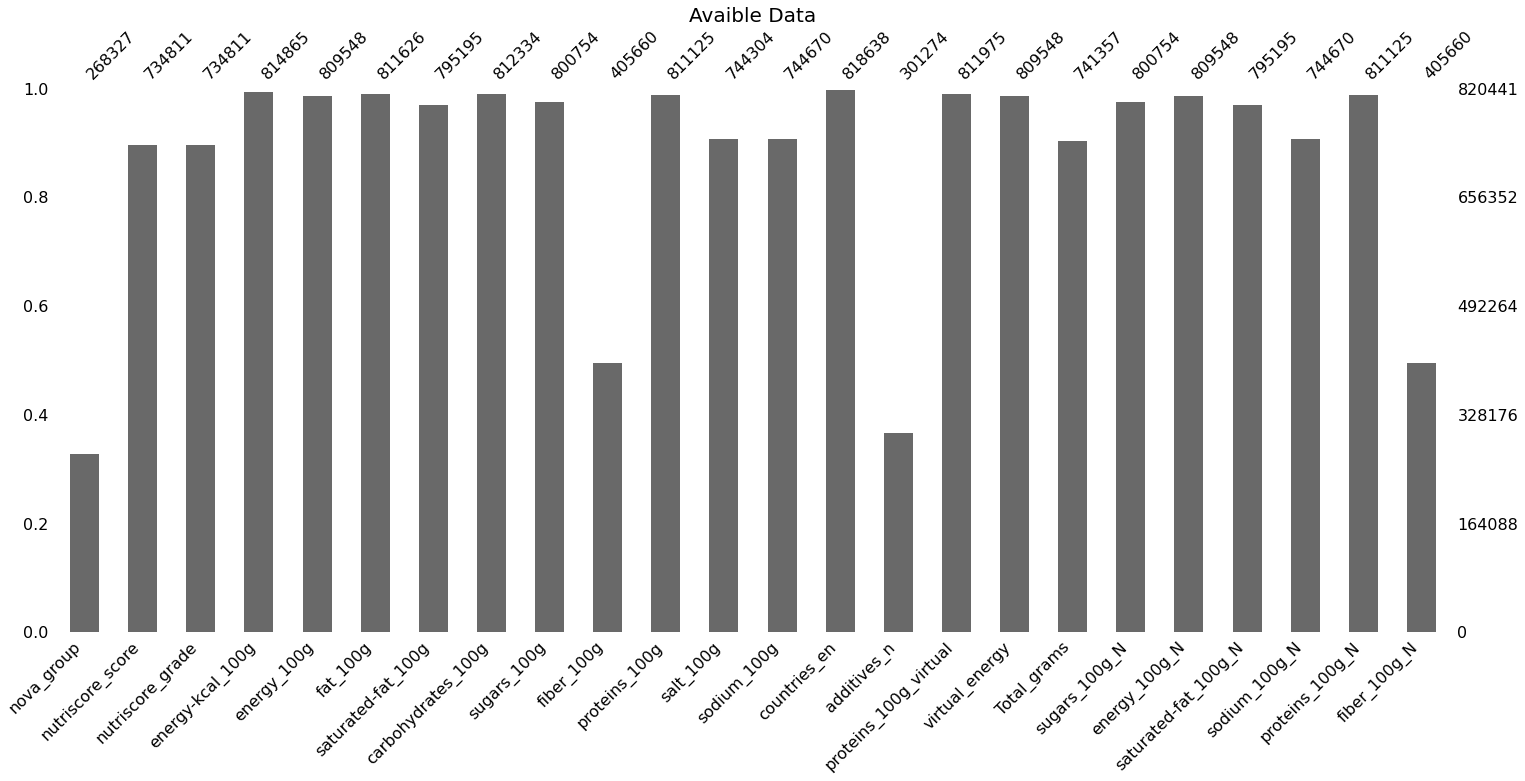

In [86]:
sorted_data = msno.nullity_sort(df, sort='descending' )# or sort='ascending'
msno.bar(sorted_data)
plt.title('Avaible Data', fontsize = 20) # title with fontsize 20
#plt.xlabel('Years', fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel('', fontsize = 15) # y-axis label with fontsize 15
#plt.savefig('Avaible Data')

Text(0.5, 1.0, 'Avaible Data')

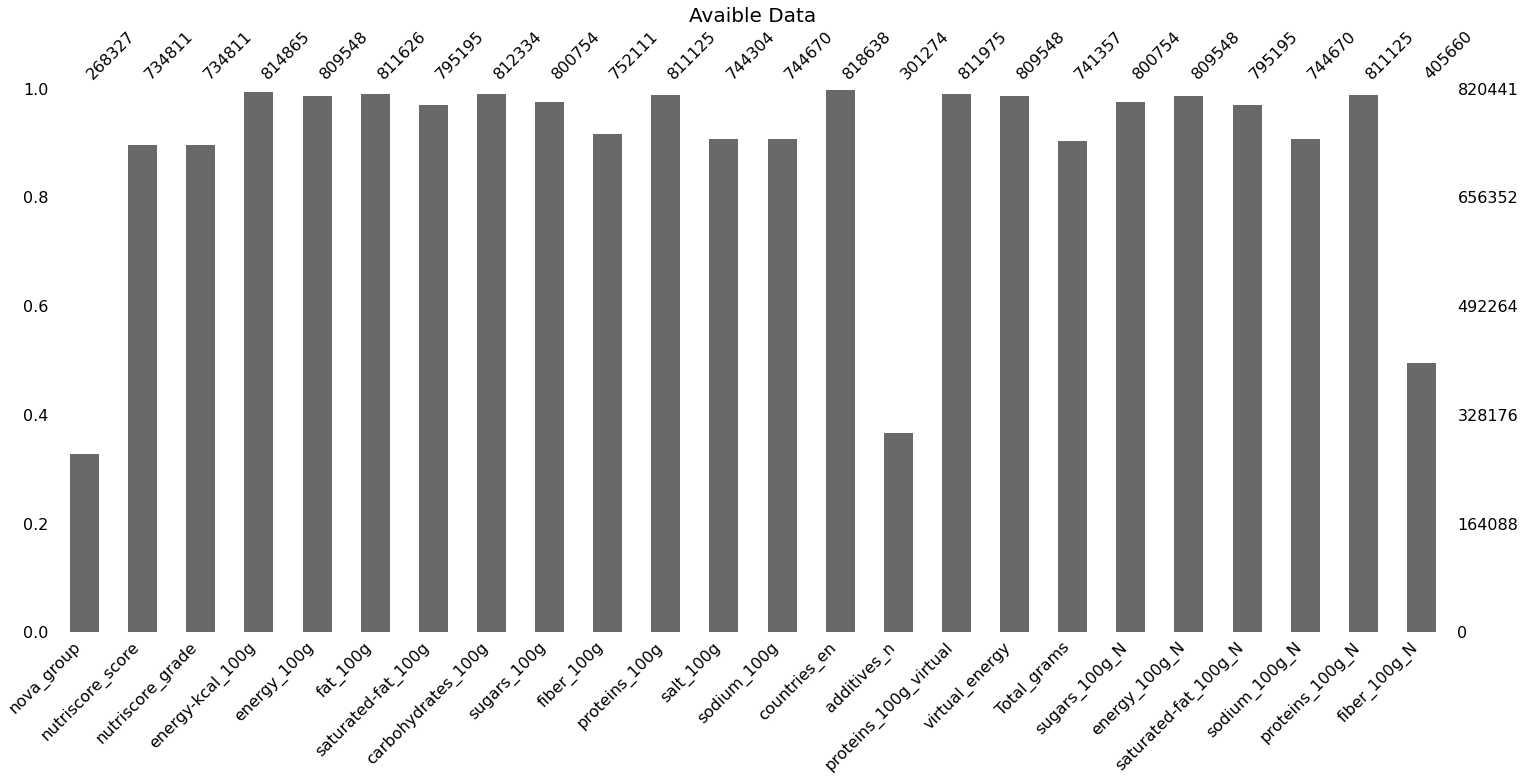

In [10]:
sorted_data = msno.nullity_sort(df, sort='descending' )# or sort='ascending'
msno.bar(sorted_data)
plt.title('Avaible Data', fontsize = 20) # title with fontsize 20
#plt.xlabel('Years', fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel('', fontsize = 15) # y-axis label with fontsize 15
#plt.savefig('Avaible Data')

# <font color='red'> !!!YOU CAN START FROM HERE NOW  NO NEED TO REDO ALL !!!

In [5]:
#df.to_csv('Check_point1.csv',index = False)
df = pd.read_csv('Check_point1.csv')